In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# data (as pandas dataframes) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets 
  
# metadata 
print(glioma_grading_clinical_and_mutation_features.metadata) 
  
# variable information 
print(glioma_grading_clinical_and_mutation_features.variables) 


{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
glioma_grading = fetch_ucirepo(id=759)

In [11]:
df = pd.concat([glioma_grading.data.features, glioma_grading.data.targets], axis=1)

In [13]:
print("Dataset Variables Information:")
print(glioma_grading.variables) #
df.head()

Dataset Variables Information:
                name     role         type demographic  \
0              Grade   Target  Categorical        None   
1             Gender  Feature  Categorical      Gender   
2   Age_at_diagnosis  Feature   Continuous         Age   
3               Race  Feature  Categorical        Race   
4               IDH1  Feature  Categorical        None   
5               TP53  Feature  Categorical        None   
6               ATRX  Feature  Categorical        None   
7               PTEN  Feature  Categorical        None   
8               EGFR  Feature  Categorical        None   
9                CIC  Feature  Categorical        None   
10             MUC16  Feature  Categorical        None   
11            PIK3CA  Feature  Categorical        None   
12               NF1  Feature  Categorical        None   
13            PIK3R1  Feature  Categorical        None   
14             FUBP1  Feature  Categorical        None   
15               RB1  Feature  Categorica

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,0,51.30,white,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,white,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,white,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print("\nSum of null values per column:")
print(df.isnull().sum())


Sum of null values per column:
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
Grade               0
dtype: int64


In [17]:
df = df.dropna()

In [19]:
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].fillna(df['Age_at_diagnosis'].mean())

In [21]:
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].astype(int)

In [23]:
df.rename(columns={'Gender': 'Sex'}, inplace=True)

In [25]:
df['Grade'] = df['Grade'].replace({'LGG': 0, 'GBM': 1})

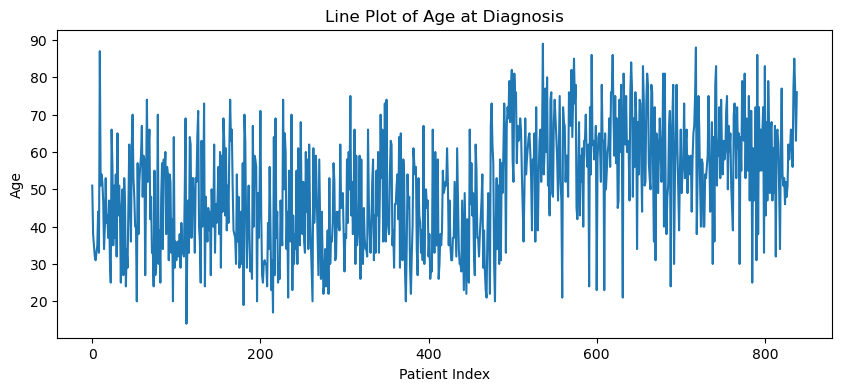

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(df['Age_at_diagnosis'])
plt.title("Line Plot of Age at Diagnosis")
plt.xlabel("Patient Index")
plt.ylabel("Age")
plt.show()

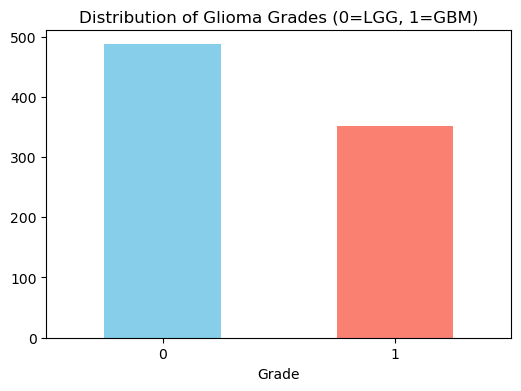

In [29]:
plt.figure(figsize=(6, 4))
df['Grade'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Glioma Grades (0=LGG, 1=GBM)")
plt.xticks(rotation=0)
plt.show()

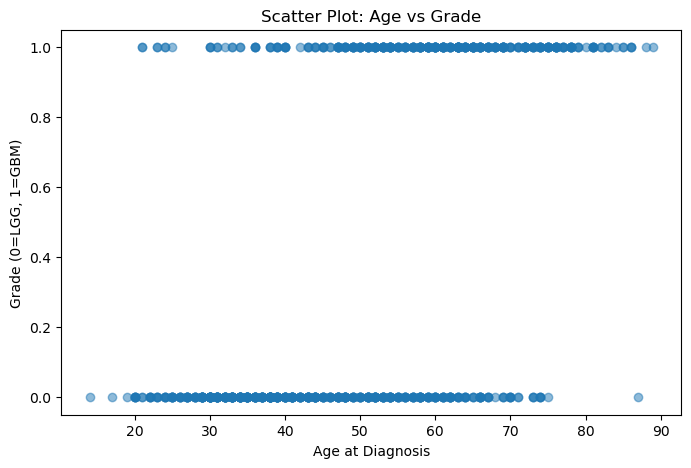

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age_at_diagnosis'], df['Grade'], alpha=0.5)
plt.xlabel("Age at Diagnosis")
plt.ylabel("Grade (0=LGG, 1=GBM)")
plt.title("Scatter Plot: Age vs Grade")
plt.show()

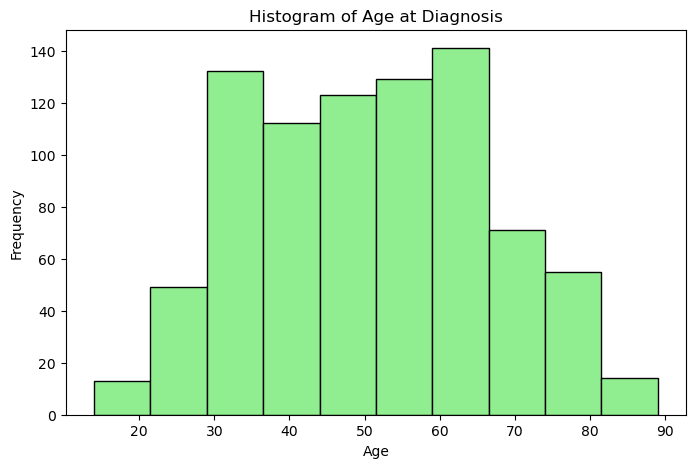

In [35]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age_at_diagnosis'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Histogram of Age at Diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

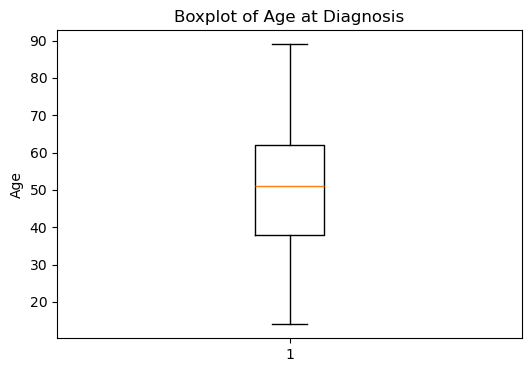

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age_at_diagnosis'])
plt.title("Boxplot of Age at Diagnosis")
plt.ylabel("Age")
plt.show()

In [39]:
num_df = df.select_dtypes(include=[np.number])

stats_df = pd.DataFrame({
    "Mean": num_df.mean(),
    "Median": num_df.median(),
    "Mode": num_df.mode().iloc[0],
    "Std Deviation": num_df.std(),
    "Min": num_df.min(),
    "Max": num_df.max(),
    "Sum": num_df.sum(),
    "Q1 (25%)": num_df.quantile(0.25),
    "Q2 (50%)": num_df.quantile(0.50),
    "Q3 (75%)": num_df.quantile(0.75),
    "90th Percentile": num_df.quantile(0.90)
})

print("\nDescriptive Statistics Table:")
print(stats_df)

print("\nCorrelation Matrix (First 5 variables):")
print(num_df.corr().iloc[:5, :5])


Descriptive Statistics Table:
                       Mean  Median  Mode  Std Deviation  Min  Max    Sum  \
Sex                0.418355     0.0     0       0.493583    0    1    351   
Age_at_diagnosis  50.446961    51.0    38      15.712565   14   89  42325   
IDH1               0.481526     0.0     0       0.499957    0    1    404   
TP53               0.414779     0.0     0       0.492978    0    1    348   
ATRX               0.258641     0.0     0       0.438149    0    1    217   
PTEN               0.168057     0.0     0       0.374140    0    1    141   
EGFR               0.133492     0.0     0       0.340309    0    1    112   
CIC                0.132300     0.0     0       0.339019    0    1    111   
MUC16              0.116806     0.0     0       0.321380    0    1     98   
PIK3CA             0.087008     0.0     0       0.282015    0    1     73   
NF1                0.079857     0.0     0       0.271233    0    1     67   
PIK3R1             0.064362     0.0     0    